<a href="https://colab.research.google.com/github/jmparradov/Machine-Learning-II---Talleres/blob/main/Taller_1_Machine_Learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning 2 - Assignment \#1 <br> Data Science Specialization University of Antioquia

Professor: Hernán Felipe García Arias, PhD

March 5, 2025

## Overview

In this assignment, you will explore clustering techniques by implementing the Gaussian Mixture Model (GMM) from scratch and applying it to two datasets. You will also implement the Elbow and Silhouette methods in combination with K-Means or GMM to evaluate the optimal number of clusters based on several performance metrics.

This assignment is divided into two tasks:

1. Implementing the Gaussian Mixture Model and evaluating clustering performance using the Rand Index.
2. Evaluating clustering quality and the optimal number of clusters using the Elbow method, Silhouette analysis, and clustering metrics.

## Assignment 1: Implement Gaussian Mixture Model (GMM)

In this task, you are required to implement the GMM algorithm from scratch and apply it to the FIFA 23 Players Dataset and the EastWestAirlines Dataset for clustering. You should evaluate the performance of your clustering results using both qualitative and quantitative measures.

## Datasets

- FIFA 23 Players Dataset: This dataset contains detailed attributes of professional soccer players. The objective is to cluster players based on their skills and playing styles. Relevant features for clustering include:
- Age
- Overall rating (general skill level)
- Potential (maximum projected skill level)
- Value (market price in €)
- Wage (weekly salary)
- Shooting, Passing, Dribbling (technical abilities)
- Defending, Physicality (defensive capabilities)

You can download the dataset from Kaggle: FIFA 23 Dataset - Kaggle.

- EastWestAirlines Dataset: This dataset contains information about airline customers and their behaviors. You should preprocess the dataset as necessary before applying the clustering algorithm. (Dataset available here.)


## Tasks

1. Implement the Gaussian Mixture Model algorithm from scratch. Do not use libraries like scikit-learn's GMM implementation for this part.
2. Fit the GMM to both datasets (FIFA 23 Players and EastWestAirlines) and perform clustering.
3. Evaluate your clustering results using the following methods:

- Rand Index: Calculate the Rand Index to compare your clustering results against meaningful labels (e.g., player positions). Read more about the Rand Index here: Rand Index - Wikipedia.
- Qualitative Evaluation: For both datasets, visualize and describe the resulting clusters (e.g., scatter plots, pair plots, or other visualizations that highlight the formed groups). For visualizations in Python, you may refer to this guide: Seaborn Visualization Library.


## Hints and Useful Links

- For a detailed explanation on how Gaussian Mixture Models work and how to implement them, see this tutorial: Gaussian Mixture Model - scikit-learn documentation.
- To understand the mathematical background and principles behind GMM, this reference may help: Mixture Model - Wikipedia.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
csv_url = 'https://raw.githubusercontent.com/jmparradov/Machine-Learning-II---Talleres/refs/heads/main/Data/FIFA23_official_data.csv'

try:
    df = pd.read_csv(csv_url)
    print("Data imported successfully!")
    # Now you can work with the DataFrame 'df'
    # For example, to display the first 5 rows:
    print(df.head())

except Exception as e:
    print(f"An error occurred: {e}")


Data imported successfully!
       ID             Name  Age  \
0  209658      L. Goretzka   27   
1  212198  Bruno Fernandes   27   
2  224334         M. Acuña   30   
3  192985     K. De Bruyne   31   
4  224232       N. Barella   25   

                                              Photo Nationality  \
0  https://cdn.sofifa.net/players/209/658/23_60.png     Germany   
1  https://cdn.sofifa.net/players/212/198/23_60.png    Portugal   
2  https://cdn.sofifa.net/players/224/334/23_60.png   Argentina   
3  https://cdn.sofifa.net/players/192/985/23_60.png     Belgium   
4  https://cdn.sofifa.net/players/224/232/23_60.png       Italy   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.net/flags/de.png       87         88  FC Bayern München   
1  https://cdn.sofifa.net/flags/pt.png       86         87  Manchester United   
2  https://cdn.sofifa.net/flags/ar.png       85         85         Sevilla FC   
3  https://cdn.sofifa.net/flags/be

In [4]:
# Columns to keep
columns_to_keep = ['Name', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Preferred Foot', 'Weak Foot', 'Skill Moves']

# Create a new DataFrame with only the selected columns
df = df[columns_to_keep]

# Now df_selected contains only the desired columns
print(df.head())


              Name  Age  Overall  Potential    Value   Wage Preferred Foot  \
0      L. Goretzka   27       87         88     €91M  €115K          Right   
1  Bruno Fernandes   27       86         87   €78.5M  €190K          Right   
2         M. Acuña   30       85         85   €46.5M   €46K           Left   
3     K. De Bruyne   31       91         91  €107.5M  €350K          Right   
4       N. Barella   25       86         89   €89.5M  €110K          Right   

   Weak Foot  Skill Moves  
0        4.0          3.0  
1        3.0          4.0  
2        3.0          3.0  
3        5.0          4.0  
4        3.0          3.0  


In [5]:
# prompt: convert the values from the files Value and Wage to floats, identify the format origin

# Convert 'Value' and 'Wage' columns to numeric, handling errors
df['Value'] = df['Value'].astype(str).str.replace('€', '', regex=False)
df['Wage'] = df['Wage'].astype(str).str.replace('€', '', regex=False)

def convert_currency(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    else:
        return float(value)

df['Value'] = df['Value'].apply(convert_currency)
df['Wage'] = df['Wage'].apply(convert_currency)

# Identify the original format
df.head()


,Name,Age,Overall,Potential,Value,Wage,Preferred Foot,Weak Foot,Skill Moves
0,L. Goretzka,27,87,88,91000000.0,115000.0,Right,4.0,3.0
1,Bruno Fernandes,27,86,87,78500000.0,190000.0,Right,3.0,4.0
2,M. Acuña,30,85,85,46500000.0,46000.0,Left,3.0,3.0
3,K. De Bruyne,31,91,91,107500000.0,350000.0,Right,5.0,4.0
4,N. Barella,25,86,89,89500000.0,110000.0,Right,3.0,3.0


In [6]:
df.describe()

,Age,Overall,Potential,Value,Wage,Weak Foot,Skill Moves
count,17660.000000,17660.000000,17660.000000,1.766000e+04,17660.000000,17660.000000,17660.000000
mean,23.127746,63.369592,70.981200,2.739788e+06,8189.807475,2.900340,2.297169
std,4.639821,8.036268,6.529836,7.841276e+06,20476.733001,0.663523,0.754264
min,15.000000,43.000000,42.000000,0.000000e+00,0.000000,1.000000,1.000000
25%,20.000000,58.000000,67.000000,3.250000e+05,550.000000,3.000000,2.000000
50%,22.000000,63.000000,71.000000,7.000000e+05,2000.000000,3.000000,2.000000
75%,26.000000,69.000000,75.000000,1.725000e+06,6000.000000,3.000000,3.000000
max,54.000000,91.000000,95.000000,1.905000e+08,450000.000000,5.000000,5.000000


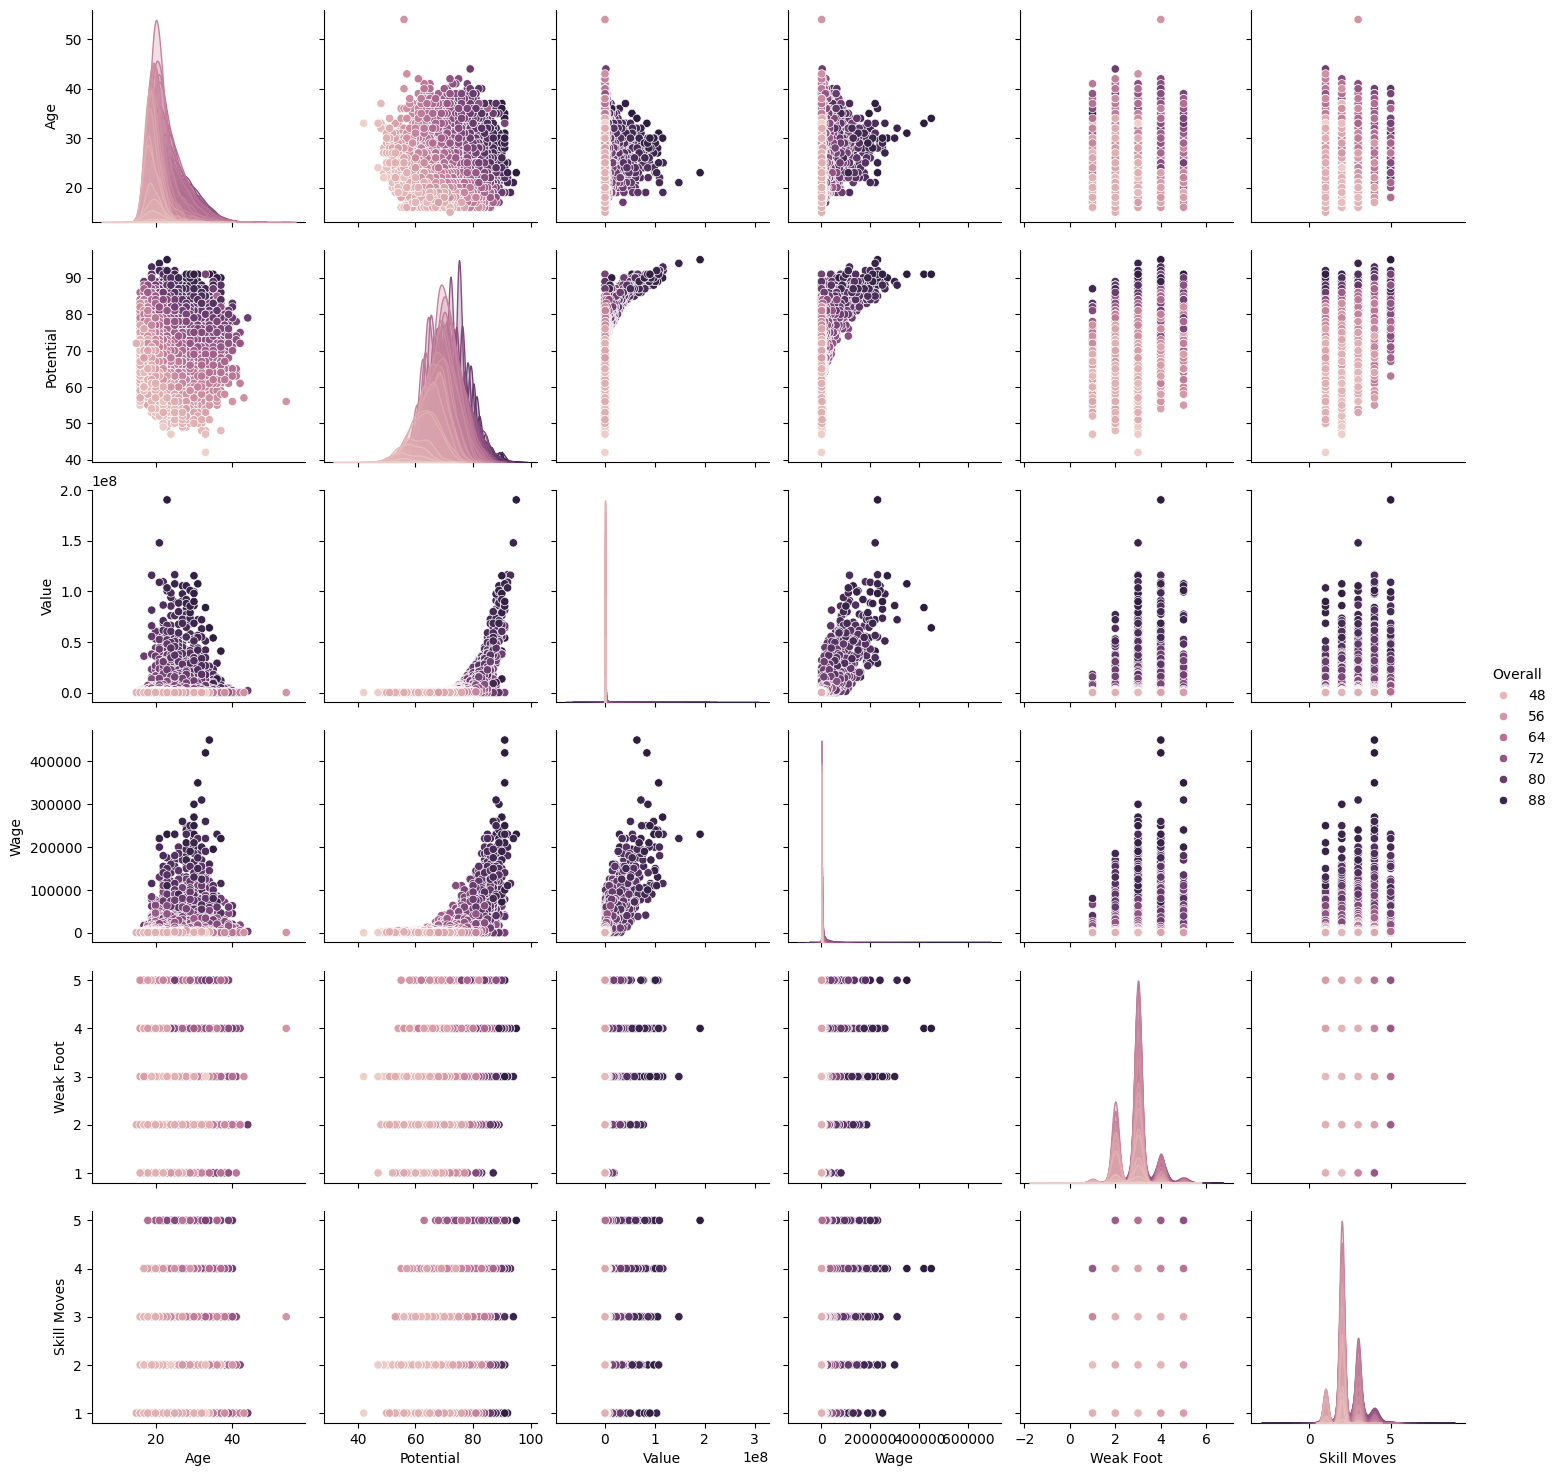

In [7]:
sns.pairplot(df, hue='Overall')


In [8]:
# Convert the DataFrame to a NumPy array
X = df.to_numpy()

# Display the dimensions of the NumPy array
X.shape


(17660, 9)

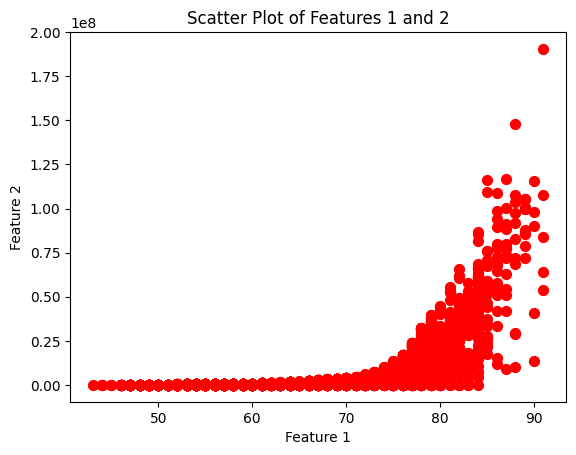

In [9]:
# Seleccionemos como prueba los features 0, 2
plt.scatter(X[:,2], X[:,4], marker='o', color='r', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Features 1 and 2')
plt.show()

[[9.16666667e-01 4.77690289e-01]
 [8.95833333e-01 4.12073491e-01]
 [8.75000000e-01 2.44094488e-01]
 ...
 [1.66666667e-01 3.67454068e-04]
 [1.45833333e-01 4.72440945e-04]
 [1.45833333e-01 4.72440945e-04]]


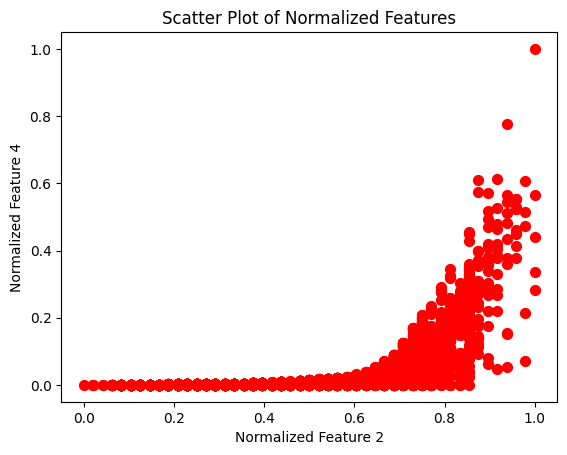

In [10]:
# prompt: normalaize all the numeric values on X

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming X is your NumPy array
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X[:, [2,4]]) # Apply normalization to selected columns (2 and 4)

# Now X_normalized contains the normalized values for features 2 and 4
print(X_normalized)

plt.scatter(X_normalized[:,0], X_normalized[:,1], marker='o', color='r', s=50)
plt.xlabel('Normalized Feature 2')
plt.ylabel('Normalized Feature 4')
plt.title('Scatter Plot of Normalized Features')
plt.show()


In [36]:
# Inicializar aleatoriamente los theta_old
# Fija el mnúmero de clusters K = 3
np.random.seed(42)
pi1 = 0.035
pi2 = 0.05
pi3 = 0.06
mu_1 = np.random.randn(2,) + np.reshape([0.3,0.1],(2,))
mu_2 = np.random.randn(2,) + np.reshape([0.7,0.2],(2,))
mu_3 = np.random.randn(2,) + np.reshape([0.3,0.8],(2,))
print(mu_1, mu_2, mu_3)

[ 0.79671415 -0.0382643 ] [1.34768854 1.72302986] [0.06584663 0.56586304]


In [34]:
aux = np.random.randn(2,2)
print(aux)
Sigma_1 =0.5*aux.T@aux
aux2 = np.random.randn(2,2)
Sigma_2 = 0.5*aux2.T@aux2
aux3 = np.random.randn(2,2)
Sigma_3 = 0.5*aux3.T@aux3
print(Sigma_1, np.linalg.det(Sigma_1))
print(Sigma_2, np.linalg.det(Sigma_2))
print(Sigma_3, np.linalg.det(Sigma_3))


[[ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]]
[[1.35715966 0.47861236]
 [0.47861236 0.44166373]] 0.3703384104305172
[[ 0.13665085 -0.12355711]
 [-0.12355711  1.93877275]] 0.24966858280658477
[[2.0005842  0.32581015]
 [0.32581015 0.20745933]] 0.3088875935403325


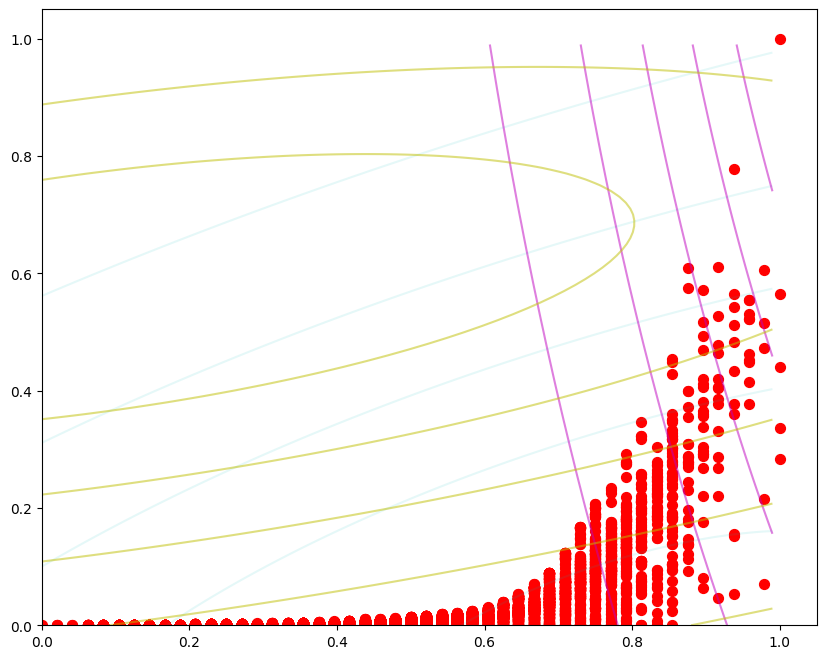

In [37]:
# Graficamos el ajuste inicial
from scipy.stats import multivariate_normal

# Create a grid of points
x, y = np.mgrid[0:1:.01, 0:1:.01]
pos = np.dstack((x, y))

# Calculate the Gaussian probability density function for each class
rv1 = multivariate_normal(mu_1, Sigma_1)
rv2 = multivariate_normal(mu_2, Sigma_2)
rv3 = multivariate_normal(mu_3, Sigma_3)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)
z3 = rv3.pdf(pos)

# Plot the Gaussian distributions
plt.figure(figsize=(10, 8))
plt.contour(x, y, z1, levels=5, colors='c', alpha=0.1)
plt.contour(x, y, z2, levels=5, colors='m', alpha=0.5)
plt.contour(x, y, z3, levels=5, colors='y', alpha=0.5)

plt.scatter(X_normalized[:,0], X_normalized[:,1], marker='o', color='r', s=50)

In [38]:
gama_Znk = np.zeros((X_normalized.shape[0],3)) # Matriz de responsabilidades o Posterior P(zn|xn)

for n in range(X.shape[0]):
  x_n = X_normalized[n,:]
  for k in range(3):
    if k == 0:
      gama_Znk[n,k] = pi1 * multivariate_normal.pdf(x_n, mu_1, Sigma_1)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))
    if k == 1:
      gama_Znk[n,k] = pi2 * multivariate_normal.pdf(x_n, mu_2, Sigma_2)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))
    if k == 2:
      gama_Znk[n,k] = pi3 * multivariate_normal.pdf(x_n, mu_3, Sigma_3)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))

print(gama_Znk)

[[0.27364349 0.17602683 0.55032968]
 [0.31590898 0.15962546 0.52446556]
 [0.44545445 0.14288235 0.4116632 ]
 ...
 [0.54897136 0.00090318 0.45012545]
 [0.54134961 0.0007341  0.45791628]
 [0.54134961 0.0007341  0.45791628]]


In [41]:
# Construirmos el modelo discriminante
N1, N2, N3 = 50,50,50
N = N1+N2+N3
piC1 = N1/N
piC2 = N2/N
piC3 = N3/N


X_C1 = X_normalized[:50,:2]
X_C2 = X_normalized[50:100,:2]
X_C3 = X_normalized[100:,:2]

muC1 = np.mean(X_C1, axis=0)
muC2 = np.mean(X_C2, axis=0)
muC3 = np.mean(X_C3, axis=0)

M1 = np.tile(muC1, (N1,1))
M2 = np.tile(muC2, (N2,1))
M3 = np.tile(muC3, (N3,1))

S1 = (1./N1) * (X_C1 - M1).T.dot(X_C1 - M1)
S2 = (1./N2) * (X_C2 - M2).T.dot(X_C2 - M2)
S3 = (1./N3) * (X_C3 - M3).T.dot(X_C3 - M3)

Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

ValueError: operands could not be broadcast together with shapes (17560,2) (50,2) 


## Assignment 2: Evaluating Clustering with Elbow and Silhouette Methods

In this task, you will evaluate the performance of clustering algorithms (K-Means or GMM) using the Elbow method and Silhouette analysis. You will also investigate the impact of clustering on four relevant metrics.

## Tasks

1. Implement the Elbow method and Silhouette analysis to determine the optimal number of clusters for both the FIFA 23 and EastWestAirlines datasets.
2. Apply both K-Means and GMM clustering algorithms to each dataset and compare their performance in determining the optimal number of clusters.
3. Evaluate the clustering quality using the following four metrics:

- Silhouette Score: Measures how similar a point is to its own cluster compared to other clusters. Learn more here: Silhouette Score - scikit-learn documentation.
- Inertia: Sum of squared distances of points to their closest cluster center. Explanation can be found here: Inertia and Clustering Evaluation.
- Davies-Bouldin Index: Measures the average similarity ratio of each cluster with its most similar cluster. Learn about it here: Davies-Bouldin Index -scikit-learn documentation.

4. Discuss how the choice of the number of clusters impacts each of the four metrics and provide a recommendation for the optimal number of clusters.

## Deliverables

- Teams must submit an IPYNB notebook (Jupyter notebook) containing the complete solution to the task. This notebook should include:
- An implementation of the Elbow method and Silhouette analysis for both datasets.
- Clustering results using both K-Means and GMM for the FIFA 23 Players and EastWestAirlines datasets.
- An evaluation of the clustering performance based on the four selected metrics.
- A summary of results and analysis, including visualizations, interpretation of the results, and a discussion on how the choice of cluster number impacts clustering quality.


## Grading Rubric

- Correctness of Implementation (40\%): Accurate and complete implementation of the Gaussian Mixture Model and clustering evaluation methods.
- Evaluation and Analysis (30\%): Quality and depth of the evaluation, including correct use of Rand Index, Silhouette, and other metrics.
- Visualization and Reporting (20\%): Clear and informative visualizations, along with a well-structured report explaining your approach and findings.
- Code Quality (10\%): Readability, documentation, and organization of your code.


## Submission

Please submit your Jupyter notebooks in IPYNB format, including the complete code, analysis, and documentation in Markdown cells. The deadline for this assignment is 09/03/2025.

